In [5]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [40]:
file_in = './Takeout_uva/Chrome/History.json'
with open(file_in, "r", encoding="utf-8") as f:
    google_data = json.load(f)

print(type(google_data)) 
print(google_data.keys())

# Access and preview the first 5 entries
history_key = "Browser History" 
print(json.dumps(data[history_key][:5], indent=4))

<class 'dict'>
dict_keys(['Browser History', 'Typed Url', 'Session'])
[
    {
        "favicon_url": "https://www.google.com/favicon.ico",
        "page_transition_qualifier": "CLIENT_REDIRECT",
        "title": "Google Takeout",
        "url": "https://takeout.google.com/settings/takeout",
        "time_usec": 1739829898324945,
        "client_id": "acLVx8irzQXdebj7bnD/Og=="
    },
    {
        "favicon_url": "https://www.google.com/favicon.ico",
        "page_transition_qualifier": "CLIENT_REDIRECT",
        "title": "Google Takeout",
        "url": "https://takeout.google.com/settings/takeout",
        "time_usec": 1739829897375283,
        "client_id": "acLVx8irzQXdebj7bnD/Og=="
    },
    {
        "favicon_url": "https://www.google.com/favicon.ico",
        "page_transition_qualifier": "CLIENT_REDIRECT",
        "title": "google takeout data - Google Search",
        "url": "https://www.google.com/search?q=google+takeout+data&oq=google+takeout&gs_lcrp=EgZjaHJvbWUqDggAEEUYJxg7GIA

In [41]:

browser_history = google_data.get("Browser History", [])  # Use .get() to avoid KeyError

# Convert JSON to DataFrame
google_df = pd.DataFrame(browser_history)

# Convert time from microseconds to standard datetime
google_df["datetime"] = pd.to_datetime(google_df["time_usec"] // 1_000_000, unit="s")
google_df = google_df[["datetime", "title", "url"]]
print(google_df.head())

             datetime                           title  \
0 2025-02-22 03:00:14                  Google Takeout   
1 2025-02-22 03:00:12                  Google Takeout   
2 2025-02-22 03:00:11  google takeout - Google Search   
3 2025-02-22 03:00:11  google takeout - Google Search   
4 2025-02-22 03:00:11  google takeout - Google Search   

                                                 url  
0                        https://takeout.google.com/  
1                        https://takeout.google.com/  
2  https://www.google.com/search?q=google+takeout...  
3  https://www.google.com/search?q=google+takeout...  
4  https://www.google.com/search?q=google+takeout...  


In [61]:
# Find the first and last date
first_date = google_df["datetime"].min()
last_date = google_df["datetime"].max()

print(f"First recorded browsing activity: {first_date}")
print(f"Last recorded browsing activity: {last_date}")

First recorded browsing activity: 2024-05-14 16:34:42
Last recorded browsing activity: 2025-02-22 03:00:14


In [101]:
# Create a new column to classify searches
google_df["is_google_search"] = google_df["title"].str.contains("- Google Search", na=False)

# Count searches vs. other browsing
search_count = google_df["is_google_search"].sum()
other_count = len(google_df) - search_count

print(f"Total Google Searches: {search_count}")
print(f"Total Other Browsing: {other_count}")


Total Google Searches: 10196
Total Other Browsing: 91293


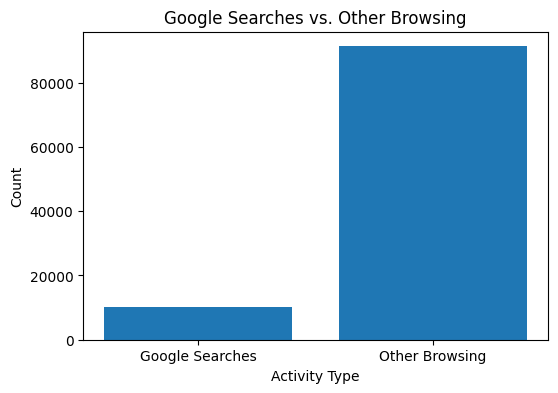

In [102]:
# Visualization
counts = [search_count, other_count]
labels = ["Google Searches", "Other Browsing"]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.title("Google Searches vs. Other Browsing")
plt.show()


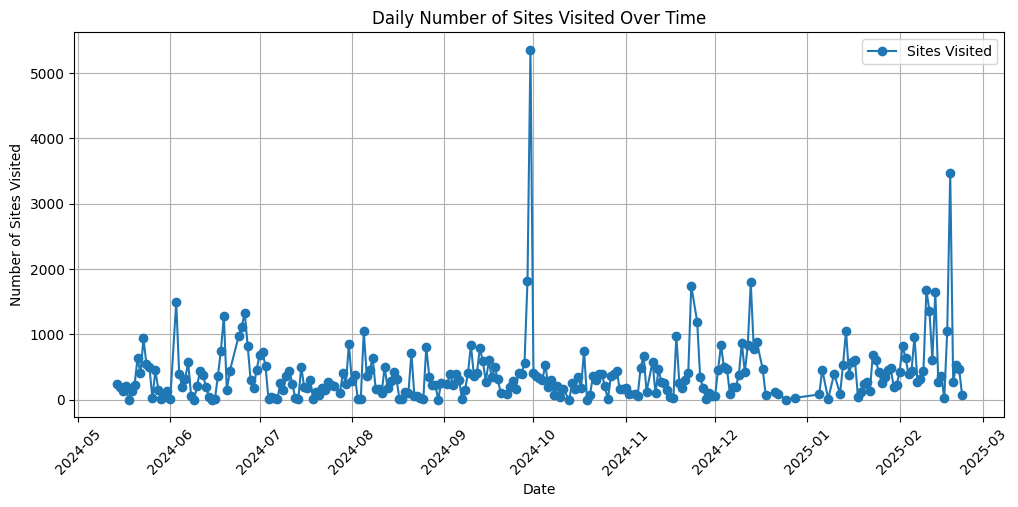

In [103]:
# Total the number of sites visited per day
daily_site_visits = google_df.groupby(google_df["datetime"].dt.date).size()

# Plot the time series of daily site visits
plt.figure(figsize=(12, 5))
plt.plot(daily_site_visits.index, daily_site_visits.values, marker="o", linestyle="-", label="Sites Visited")

plt.xlabel("Date")
plt.ylabel("Number of Sites Visited")
plt.title("Daily Number of Sites Visited Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [104]:
# Find the number of sites visited per day
daily_site_visits = google_df.groupby(google_df["datetime"].dt.date).size()

# Find the number of Google searches per day
daily_google_searches = google_df[google_df["is_google_search"]].groupby(google_df["datetime"].dt.date).size()

# Calc statistics
avg_sites_per_day = daily_site_visits.mean()
std_sites_per_day = daily_site_visits.std()
avg_google_searches_per_day = daily_google_searches.mean()
std_google_searches_per_day = daily_google_searches.std()

# Print the results
print(f"Average number of sites visited per day: {avg_sites_per_day:.2f}")
print(f"Standard deviation of sites visited per day: {std_sites_per_day:.2f}")
print(f"Average number of Google searches per day: {avg_google_searches_per_day:.2f}")
print(f"Standard deviation of Google searches per day: {std_google_searches_per_day:.2f}")


Average number of sites visited per day: 393.37
Standard deviation of sites visited per day: 501.85
Average number of Google searches per day: 43.20
Standard deviation of Google searches per day: 41.94


In [105]:
# Find the number of non-Google search site visits per day
daily_non_google_visits = google_df[~google_df["is_google_search"]].groupby(google_df["datetime"].dt.date).size()

# Get statistics
avg_non_google_sites_per_day = daily_non_google_visits.mean()
std_non_google_sites_per_day = daily_non_google_visits.std()

print(f"Average number of non-Google search sites visited per day: {avg_non_google_sites_per_day:.2f}")
print(f"Standard deviation of non-Google search sites visited per day: {std_non_google_sites_per_day:.2f}")


Average number of non-Google search sites visited per day: 353.85
Standard deviation of non-Google search sites visited per day: 485.46


# Analysis with Fitbit ground truth

In [63]:
##############################
# Chrome data

# Load and prep the Google data ---
google_file = './Takeout_uva/Chrome/History.json'
with open(google_file, "r", encoding="utf-8") as f:
    google_data = json.load(f)

# Get the browsing history list
browser_history = google_data.get("Browser History", [])
google_df = pd.DataFrame(browser_history)

# Convert time from microseconds to datetime
google_df["datetime"] = pd.to_datetime(google_df["time_usec"] // 1_000_000, unit="s")

# Keep only relevant cols and sort by time
google_df = google_df[["datetime", "title", "url"]].sort_values(by="datetime").reset_index(drop=True)

# Extract the date and hour for each record
google_df["date"] = google_df["datetime"].dt.date
google_df["hour"] = google_df["datetime"].dt.hour

# For Each Day, Estimate Wake Time and Bedtime ---
# (Wake time = first usage after 6 AM; Bedtime = last usage before midnight)
all_dates = pd.date_range(start=google_df["date"].min(), end=google_df["date"].max(), freq="D")
est_records = []

for single_date in all_dates:
    current_date = single_date.date()
    day_df = google_df[google_df["date"] == current_date]
    
    # Est wake
    wake_df = day_df[day_df["hour"] >= 6]
    if not wake_df.empty:
        est_wake = wake_df["datetime"].min()
    else:
        est_wake = None
    
    # Est bedtime
    bedtime_df = day_df  # since any record in a day is before midnight
    if not bedtime_df.empty:
        est_bed = bedtime_df["datetime"].max()
    else:
        est_bed = None

    est_records.append({
        "date": pd.to_datetime(current_date),
        "wake_time_google": est_wake,
        "bedtime_google": est_bed
    })

est_sleep_df = pd.DataFrame(est_records)

# Get hour for plotting/comparison
est_sleep_df["wake_hour_google"] = est_sleep_df["wake_time_google"].dt.hour
est_sleep_df["bedtime_hour_google"] = est_sleep_df["bedtime_google"].dt.hour

In [65]:
print(est_sleep_df)

          date    wake_time_google      bedtime_google  wake_hour_google  \
0   2024-05-14 2024-05-14 16:34:42 2024-05-14 20:54:01              16.0   
1   2024-05-15 2024-05-15 14:22:48 2024-05-15 23:20:27              14.0   
2   2024-05-16 2024-05-16 12:17:55 2024-05-16 21:55:42              12.0   
3   2024-05-17 2024-05-17 12:42:48 2024-05-17 23:00:55              12.0   
4   2024-05-18 2024-05-18 15:56:27 2024-05-18 15:56:27              15.0   
..         ...                 ...                 ...               ...   
280 2025-02-18 2025-02-18 15:53:24 2025-02-18 23:26:10              15.0   
281 2025-02-19 2025-02-19 15:23:41 2025-02-19 20:29:12              15.0   
282 2025-02-20 2025-02-20 14:57:56 2025-02-20 23:17:39              14.0   
283 2025-02-21 2025-02-21 15:08:06 2025-02-21 21:22:15              15.0   
284 2025-02-22                 NaT 2025-02-22 03:00:14               NaN   

     bedtime_hour_google  
0                   20.0  
1                   23.0  
2     

In [79]:
import glob
import json
import pandas as pd

'''Get Fitbit!'''
# Define the date range
start_date = pd.to_datetime("2024-05-14").date()
end_date = pd.to_datetime("2025-02-21").date()

# Find all files that start with "sleep"
sleep_files = glob.glob("./Takeout_fitbit/Fitbit/Global_Export_Data/sleep*.json")

print("Found sleep files:", sleep_files)

records = []

for file in sleep_files:
    print(f"\nProcessing file: {file}") 
    with open(file, "r", encoding="utf-8") as f:
        try:
            data = json.load(f)
            
            if not isinstance(data, list):
                print(f"Unexpected data format in {file}: {type(data)}. Skipping.")
                continue
            
            for session in data:
                try:
                    # Extract sleep session date
                    date_str = session.get("dateOfSleep", None)
                    if not date_str:
                        print(f"Missing dateOfSleep in {file}, skipping entry.")
                        continue  # Skip if no dateOfSleep

                    session_date = pd.to_datetime(date_str, errors="coerce").date()
                    
                    print(f"Extracted sleep date: {session_date}")

                    # Ensure the session is within the valid date range
                    if start_date <= session_date <= end_date:
                        sleep_start = pd.to_datetime(session.get("startTime", None), errors="coerce")
                        wake_time = pd.to_datetime(session.get("endTime", None), errors="coerce")

                        if pd.notnull(sleep_start) and pd.notnull(wake_time):  
                            records.append({
                                "date": session_date,
                                "startTime": sleep_start,
                                "endTime": wake_time
                            })
                        else:
                            print(f"Invalid sleep times for {session_date}, skipping!")
                except Exception as e:
                    print(f"Error processing session in {file}: {e}")
        except json.JSONDecodeError:
            print(f"Error reading JSON file: {file}")

sleep_df = pd.DataFrame(records)

if not sleep_df.empty and "date" in sleep_df.columns:
    sleep_df = sleep_df.sort_values("date").reset_index(drop=True)
else:
    print("No valid sleep records found in the specified date range.")


Found sleep files: ['./Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-06-05.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-07-05.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2023-12-08.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-04-06.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-08-04.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-12-02.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-05-06.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2025-01-01.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-10-03.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-11-02.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-09-03.json', './Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2025-01-31.json']

Processing file: ./Takeout_fitbit/Fitbit/Global_Export_Data/sleep-2024-06-05.json
Extracted sleep date: 2024-07-05
Extracted sleep date: 2024-07-05
Extracted sleep

In [82]:
# Make 'date' column same in both df
est_sleep_df["date"] = pd.to_datetime(est_sleep_df["date"]).dt.date
sleep_df["date"] = pd.to_datetime(sleep_df["date"]).dt.date

# Merge on 'date' (which is now a date object in both df)
merged_df = pd.merge(est_sleep_df, sleep_df, on="date", how="inner")

# Compute diff in mins
merged_df["bedtime_diff_min"] = (merged_df["startTime"] - merged_df["bedtime_google"]).dt.total_seconds().abs() / 60
merged_df["wake_diff_min"] = (merged_df["endTime"] - merged_df["wake_time_google"]).dt.total_seconds().abs() / 60

# Summarize acc metrics
accuracy_metrics = {
    "Bedtime Mean Error (min)": merged_df["bedtime_diff_min"].mean(),
    "Bedtime Median Error (min)": merged_df["bedtime_diff_min"].median(),
    "Bedtime Std Dev (min)": merged_df["bedtime_diff_min"].std(),
    "Wake Time Mean Error (min)": merged_df["wake_diff_min"].mean(),
    "Wake Time Median Error (min)": merged_df["wake_diff_min"].median(),
    "Wake Time Std Dev (min)": merged_df["wake_diff_min"].std(),
}

# Print results
print("Accuracy Metrics (Fitbit vs. Google Estimated Sleep Times):")
for k, v in accuracy_metrics.items():
    print(f"{k}: {v:.1f} minutes")

# Show a sample of the merged data
print("\nSample of Merged Data with Accuracy Calculation:")
print(merged_df[["date", "bedtime_google", "startTime", "bedtime_diff_min", "wake_time_google", "endTime", "wake_diff_min"]].head())


Accuracy Metrics (Fitbit vs. Google Estimated Sleep Times):
Bedtime Mean Error (min): 1224.5 minutes
Bedtime Median Error (min): 1315.2 minutes
Bedtime Std Dev (min): 279.3 minutes
Wake Time Mean Error (min): 321.6 minutes
Wake Time Median Error (min): 353.0 minutes
Wake Time Std Dev (min): 171.4 minutes

Sample of Merged Data with Accuracy Calculation:
         date      bedtime_google           startTime  bedtime_diff_min  \
0  2024-05-14 2024-05-14 20:54:01 2024-05-14 00:26:00       1228.016667   
1  2024-05-15 2024-05-15 23:20:27 2024-05-15 00:35:00       1365.450000   
2  2024-05-16 2024-05-16 21:55:42 2024-05-15 23:22:30       1353.200000   
3  2024-05-17 2024-05-17 23:00:55 2024-05-16 23:09:00       1431.916667   
4  2024-05-18 2024-05-18 15:56:27 2024-05-17 23:14:30       1001.950000   

     wake_time_google             endTime  wake_diff_min  
0 2024-05-14 16:34:42 2024-05-14 08:38:30     476.200000  
1 2024-05-15 14:22:48 2024-05-15 08:25:30     357.300000  
2 2024-05-16 12:

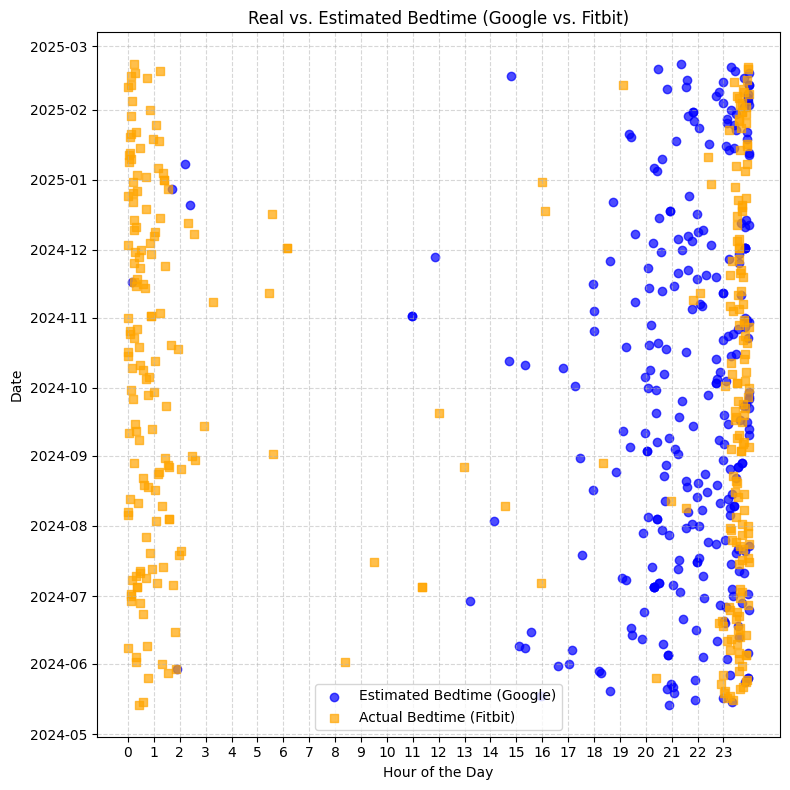

In [88]:
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Convert bedtime times to hours for easier plotting
estimated_bedtime_hours = merged_df["bedtime_google"].dt.hour + merged_df["bedtime_google"].dt.minute / 60
actual_bedtime_hours = merged_df["startTime"].dt.hour + merged_df["startTime"].dt.minute / 60

plt.figure(figsize=(8, 8)) 

# Scatter plot with estimated and actual bedtime
plt.scatter(estimated_bedtime_hours, merged_df["date"], marker="o", label="Estimated Bedtime (Google)", color="blue", alpha=0.7)
plt.scatter(actual_bedtime_hours, merged_df["date"], marker="s", label="Actual Bedtime (Fitbit)", color="orange", alpha=0.7)

plt.xlabel("Hour of the Day")
plt.ylabel("Date")
plt.title("Real vs. Estimated Bedtime (Google vs. Fitbit)")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


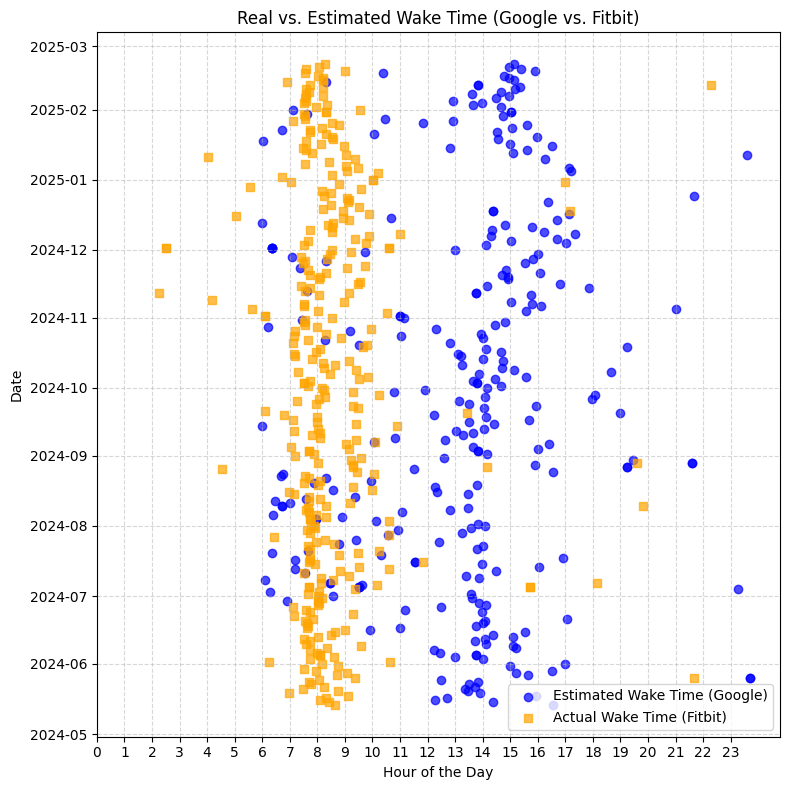

In [90]:
merged_df["date"] = pd.to_datetime(merged_df["date"])

estimated_wake_hours = merged_df["wake_time_google"].dt.hour + merged_df["wake_time_google"].dt.minute / 60
actual_wake_hours = merged_df["endTime"].dt.hour + merged_df["endTime"].dt.minute / 60

plt.figure(figsize=(8, 8))  

plt.scatter(estimated_wake_hours, merged_df["date"], marker="o", label="Estimated Wake Time (Google)", color="blue", alpha=0.7)
plt.scatter(actual_wake_hours, merged_df["date"], marker="s", label="Actual Wake Time (Fitbit)", color="orange", alpha=0.7)

plt.xlabel("Hour of the Day")
plt.ylabel("Date")
plt.title("Real vs. Estimated Wake Time (Google vs. Fitbit)")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [95]:
def cyclic_time_difference(estimated, actual):
    """ Compute the abs cyclic difference between 2 times (hours). """
    diff = np.abs(estimated - actual)
    return np.minimum(diff, 24 - diff)  # Handle wrap-around at midnight

# Convert times to hours (fractional) for cyclic computation
estimated_bedtime_hours = merged_df["bedtime_google"].dt.hour + merged_df["bedtime_google"].dt.minute / 60
actual_bedtime_hours = merged_df["startTime"].dt.hour + merged_df["startTime"].dt.minute / 60

estimated_wake_hours = merged_df["wake_time_google"].dt.hour + merged_df["wake_time_google"].dt.minute / 60
actual_wake_hours = merged_df["endTime"].dt.hour + merged_df["endTime"].dt.minute / 60

# Compute cyclic errors (in minutes)
merged_df["bedtime_error_min"] = cyclic_time_difference(estimated_bedtime_hours, actual_bedtime_hours) * 60
merged_df["wake_time_error_min"] = cyclic_time_difference(estimated_wake_hours, actual_wake_hours) * 60

# Calc error metrics
mae_bedtime = merged_df["bedtime_error_min"].mean()
mae_wake_time = merged_df["wake_time_error_min"].mean()

rmse_bedtime = np.sqrt((merged_df["bedtime_error_min"]**2).mean())
rmse_wake_time = np.sqrt((merged_df["wake_time_error_min"]**2).mean())

# Calc cyclic bias (Mean Error) ensuring wrap-around at 24 hours
mean_error_bedtime = np.mean((estimated_bedtime_hours - actual_bedtime_hours) % 24)
mean_error_wake_time = np.mean((estimated_wake_hours - actual_wake_hours) % 24)

# Get cyclic sleep duration error
estimated_sleep_duration = (estimated_wake_hours - estimated_bedtime_hours) % 24
actual_sleep_duration = (actual_wake_hours - actual_bedtime_hours) % 24
mae_sleep_duration = np.mean(np.abs(estimated_sleep_duration - actual_sleep_duration)) * 60

print(f"Bedtime - Mean Absolute Error (MAE): {mae_bedtime:.2f} min")
print(f"Bedtime - Root Mean Squared Error (RMSE): {rmse_bedtime:.2f} min")
print(f"Wake Time - Mean Absolute Error (MAE): {mae_wake_time:.2f} min")
print(f"Wake Time - Root Mean Squared Error (RMSE): {rmse_wake_time:.2f} min")

print(f"Mean Error (Bias) - Bedtime: {mean_error_bedtime:.2f} hours")
print(f"Mean Error (Bias) - Wake Time: {mean_error_wake_time:.2f} hours")

print(f"Mean Absolute Error (MAE) - Sleep Duration: {mae_sleep_duration:.2f} min")


Bedtime - Mean Absolute Error (MAE): 171.73 min
Bedtime - Root Mean Squared Error (RMSE): 235.68 min
Wake Time - Mean Absolute Error (MAE): 315.14 min
Wake Time - Root Mean Squared Error (RMSE): 351.46 min
Mean Error (Bias) - Bedtime: 18.41 hours
Mean Error (Bias) - Wake Time: 7.97 hours
Mean Absolute Error (MAE) - Sleep Duration: 460.29 min


In [96]:
# Define max possible error (assumed max deviation is 12 hours = 720 min)
max_possible_error = 12 * 60 

# Get accuracy scores for bedtime and wake time
merged_df["bedtime_accuracy"] = 1 - (merged_df["bedtime_error_min"] / max_possible_error)
merged_df["wake_time_accuracy"] = 1 - (merged_df["wake_time_error_min"] / max_possible_error)

# Clip values to ensure they stay between 0 and 1
merged_df["bedtime_accuracy"] = merged_df["bedtime_accuracy"].clip(0, 1)
merged_df["wake_time_accuracy"] = merged_df["wake_time_accuracy"].clip(0, 1)

# Calc overall average accuracy
avg_bedtime_accuracy = merged_df["bedtime_accuracy"].mean()
avg_wake_time_accuracy = merged_df["wake_time_accuracy"].mean()

print(f"Average Bedtime Accuracy: {avg_bedtime_accuracy:.2%}")
print(f"Average Wake Time Accuracy: {avg_wake_time_accuracy:.2%}")
print(merged_df[["date", "bedtime_accuracy", "wake_time_accuracy"]].head())


Average Bedtime Accuracy: 76.15%
Average Wake Time Accuracy: 56.23%
        date  bedtime_accuracy  wake_time_accuracy
0 2024-05-14          0.705556            0.338889
1 2024-05-15          0.895833            0.504167
2 2024-05-16          0.879167            0.651389
3 2024-05-17          0.987500            0.633333
4 2024-05-18          0.391667            0.430556


In [116]:
import numpy as np
from scipy.stats import circmean, circstd
from datetime import time

def hours_to_time_str(hours):
    """Convert fractional hours (0-24) to HH:MM AM/PM format. Returns 'No Data' if NaN."""
    if np.isnan(hours):
        return "No Data"
    hours_int = int(hours)
    minutes = int(round((hours - hours_int) * 60))
    return time(hour=hours_int % 24, minute=minutes).strftime("%I:%M %p")

def adjust_bedtime(hours_array):
    """Shift bedtimes less than 12 by adding 24 so that 0-12 become 24-36."""
    return np.array([x if x >= 12 else x + 24 for x in hours_array])

def revert_bedtime(avg):
    return avg - 24 if avg >= 24 else avg

# Drop NaNs before computing circular statistics
valid_estimated_bedtime = merged_df["estimated_bedtime_hours"].dropna()
valid_actual_bedtime = merged_df["actual_bedtime_hours"].dropna()

valid_estimated_wake_time = merged_df["estimated_wake_hours"].dropna()
valid_actual_wake_time = merged_df["actual_wake_hours"].dropna()

# Adjust bedtime values (shift early-morning times)
adjusted_estimated_bedtime = adjust_bedtime(valid_estimated_bedtime)
adjusted_actual_bedtime = adjust_bedtime(valid_actual_bedtime)

# Compute circular means using the shifted domain [12,36] for bedtimes
avg_adjusted_estimated_bedtime = circmean(adjusted_estimated_bedtime, low=12, high=36)
avg_adjusted_actual_bedtime = circmean(adjusted_actual_bedtime, low=12, high=36)

# Revert the adjusted averages back to the standard 0-24 range.
avg_estimated_bedtime = revert_bedtime(avg_adjusted_estimated_bedtime)
avg_actual_bedtime = revert_bedtime(avg_adjusted_actual_bedtime)

# Compute circular standard deviations for bedtimes (using shifted values)
std_adjusted_estimated_bedtime = circstd(adjusted_estimated_bedtime, low=12, high=36)
std_adjusted_actual_bedtime = circstd(adjusted_actual_bedtime, low=12, high=36)

# For wake times, compute circular mean and std directly (assuming they are in the morning)
avg_estimated_wake_time = circmean(valid_estimated_wake_time, low=0, high=24)
avg_actual_wake_time = circmean(valid_actual_wake_time, low=0, high=24)

std_estimated_wake_time = circstd(valid_estimated_wake_time, low=0, high=24)
std_actual_wake_time = circstd(valid_actual_wake_time, low=0, high=24)

# Compute sleep durations (cyclic difference, modulo 24)
sleep_duration_estimated = (merged_df["estimated_wake_hours"] - merged_df["estimated_bedtime_hours"]) % 24
sleep_duration_actual = (merged_df["actual_wake_hours"] - merged_df["actual_bedtime_hours"]) % 24

# Compute average sleep durations
avg_estimated_sleep_duration = sleep_duration_estimated.dropna().mean()
avg_actual_sleep_duration = sleep_duration_actual.dropna().mean()

# Compute standard deviation for sleep durations using circular standard deviation
std_estimated_sleep_duration = circstd(sleep_duration_estimated.dropna(), low=0, high=24)
std_actual_sleep_duration = circstd(sleep_duration_actual.dropna(), low=0, high=24)

# Convert average times to human-readable format
avg_estimated_bedtime_str = hours_to_time_str(avg_estimated_bedtime)
avg_actual_bedtime_str = hours_to_time_str(avg_actual_bedtime)
avg_estimated_wake_time_str = hours_to_time_str(avg_estimated_wake_time)
avg_actual_wake_time_str = hours_to_time_str(avg_actual_wake_time)


print(f"Average Estimated Bedtime: {avg_estimated_bedtime_str} with std {std_adjusted_estimated_bedtime:.2f} hours")
print(f"Average Actual Bedtime (Fitbit): {avg_actual_bedtime_str} with std {std_adjusted_actual_bedtime:.2f} hours")
print()
print(f"Average Estimated Wake Time: {avg_estimated_wake_time_str} with std {std_estimated_wake_time:.2f} hours")
print(f"Average Actual Wake Time (Fitbit): {avg_actual_wake_time_str} with std {std_actual_wake_time:.2f} hours")
print()
print(f"Average Estimated Sleep Duration: {avg_estimated_sleep_duration:.2f} hours with std {std_estimated_sleep_duration:.2f} hours")
print(f"Average Actual Sleep Duration (Fitbit): {avg_actual_sleep_duration:.2f} hours with std {std_actual_sleep_duration:.2f} hours")


Average Estimated Bedtime: 09:52 PM with std 2.28 hours
Average Actual Bedtime (Fitbit): 12:08 AM with std 1.76 hours

Average Estimated Wake Time: 01:17 PM with std 3.49 hours
Average Actual Wake Time (Fitbit): 08:17 AM with std 1.77 hours

Average Estimated Sleep Duration: 14.91 hours with std 4.17 hours
Average Actual Sleep Duration (Fitbit): 7.72 hours with std 1.59 hours
